# RQ1 How many higher education institutions are found in counties with majority underrepresented groups?

## Wat are the characteristics of those institutions?

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import us

import matplotlib.pyplot as plt

from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")
from pathlib import Path
from tools import tree

today

'07-Jul-20'

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

FileNotFoundError: [Errno 2] No such file or directory: 'style-table.css'

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/intermin/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [9]:
tree(PROCESSED_DATA)

+ ../data/processed
    + counties.csv
    + geodata
        + tl_2019_us_county.cpg
        + tl_2019_us_county.dbf
        + tl_2019_us_county.prj
        + tl_2019_us_county.shp
        + tl_2019_us_county.shp.ea.iso.xml
        + tl_2019_us_county.shp.iso.xml
        + tl_2019_us_county.shx
    + institutions_data.csv
    + processed_data.csv


In [10]:
counties_df = pd.read_csv(PROCESSED_DATA/'counties.csv')
institutions_df = pd.read_csv(PROCESSED_DATA/'institutions_data.csv')
counties_shapes = gpd.read_file(PROCESSED_DATA/'geodata/tl_2019_us_county.shp')

In [11]:
counties_shapes.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."


In [12]:
counties_df.head()

,geoid,name,universe,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,state,county,asians_all,other_all
0,1001,"Autauga County, Alabama",55200.0,41412.0,10475.0,159.0,568.0,5.0,41.0,1012.0,1528.0,1,1,573.0,1212.0
1,1003,"Baldwin County, Alabama",208107.0,172768.0,19529.0,1398.0,1668.0,9.0,410.0,2972.0,9353.0,1,3,1677.0,4780.0
2,1005,"Barbour County, Alabama",25782.0,11898.0,12199.0,63.0,85.0,1.0,86.0,344.0,1106.0,1,5,86.0,493.0
3,1007,"Bibb County, Alabama",22527.0,16801.0,4974.0,8.0,37.0,0.0,0.0,160.0,547.0,1,7,37.0,168.0
4,1009,"Blount County, Alabama",57645.0,50232.0,820.0,124.0,198.0,18.0,174.0,818.0,5261.0,1,9,216.0,1116.0


In [13]:
institutions_df.head()

,institution_name,fips_state_code,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,Montana,-108.757816,48.484196,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,Texas,-99.709797,32.468943,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,Georgia,-83.528281,31.481889,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,California,-118.256726,34.146294,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,Minnesota,-93.299809,44.855722,99.0,81.0,18.0,Private for-profit,4-year or above


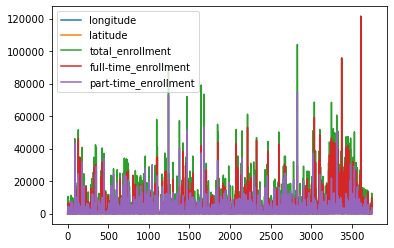

In [14]:
institutions_df.plot()

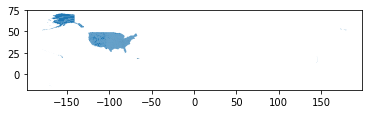

In [46]:
counties_shapes.plot();

In [15]:
counties_shapes.head().T

,0,1,2,3,4
STATEFP,31,53,35,31,31
COUNTYFP,039,069,011,109,129
COUNTYNS,00835841,01513275,00933054,00835876,00835886
GEOID,31039,53069,35011,31109,31129
NAME,Cuming,Wahkiakum,De Baca,Lancaster,Nuckolls
NAMELSAD,Cuming County,Wahkiakum County,De Baca County,Lancaster County,Nuckolls County
LSAD,06,06,06,06,06
CLASSFP,H1,H1,H1,H1,H1
MTFCC,G4020,G4020,G4020,G4020,G4020
CSAFP,None,None,None,339,None


In [16]:
us.STATES

[<State:Alabama>,
 <State:Alaska>,
 <State:Arizona>,
 <State:Arkansas>,
 <State:California>,
 <State:Colorado>,
 <State:Connecticut>,
 <State:Delaware>,
 <State:Florida>,
 <State:Georgia>,
 <State:Hawaii>,
 <State:Idaho>,
 <State:Illinois>,
 <State:Indiana>,
 <State:Iowa>,
 <State:Kansas>,
 <State:Kentucky>,
 <State:Louisiana>,
 <State:Maine>,
 <State:Maryland>,
 <State:Massachusetts>,
 <State:Michigan>,
 <State:Minnesota>,
 <State:Mississippi>,
 <State:Missouri>,
 <State:Montana>,
 <State:Nebraska>,
 <State:Nevada>,
 <State:New Hampshire>,
 <State:New Jersey>,
 <State:New Mexico>,
 <State:New York>,
 <State:North Carolina>,
 <State:North Dakota>,
 <State:Ohio>,
 <State:Oklahoma>,
 <State:Oregon>,
 <State:Pennsylvania>,
 <State:Rhode Island>,
 <State:South Carolina>,
 <State:South Dakota>,
 <State:Tennessee>,
 <State:Texas>,
 <State:Utah>,
 <State:Vermont>,
 <State:Virginia>,
 <State:Washington>,
 <State:West Virginia>,
 <State:Wisconsin>,
 <State:Wyoming>]

In [17]:
counties_shapes.shape

(3233, 18)

In [18]:
import us
us.STATES_CONTIGUOUS[0].name
us.STATES_CONTIGUOUS[0].fips
us.STATES_CONTIGUOUS[0].abbr

'Alabama'

'01'

'AL'

In [19]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]
contiguous_fips[:5]

['01', '04', '05', '06', '08']

In [20]:
mask = counties_shapes['STATEFP'].isin(contiguous_fips)

In [21]:
counties_shapes = counties_shapes[mask]
counties_shapes.shape

(3107, 18)

In [22]:
institutions_df.head()

,institution_name,fips_state_code,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,Montana,-108.757816,48.484196,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,Texas,-99.709797,32.468943,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,Georgia,-83.528281,31.481889,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,California,-118.256726,34.146294,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,Minnesota,-93.299809,44.855722,99.0,81.0,18.0,Private for-profit,4-year or above


In [23]:
institutions_df.shape

(3751, 9)

In [24]:
contiguous_names = [state.name for state in us.STATES_CONTIGUOUS]
mask = institutions_df.fips_state_code.isin(contiguous_names)
mask.shape

(3751,)

In [25]:
institutions_df[mask]

,institution_name,fips_state_code,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,Montana,-108.757816,48.484196,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,Texas,-99.709797,32.468943,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,Georgia,-83.528281,31.481889,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,California,-118.256726,34.146294,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,Minnesota,-93.299809,44.855722,99.0,81.0,18.0,Private for-profit,4-year or above
...,...,...,...,...,...,...,...,...,...
3746,Youngstown State University,Ohio,-80.646590,41.104928,12607.0,9687.0,2920.0,Public,4-year or above
3747,YTI Career Institute-Altoona,Pennsylvania,-78.395445,40.485390,39.0,39.0,0.0,Private for-profit,2-year
3748,YTI Career Institute-York,Pennsylvania,-76.660321,39.992432,1327.0,1327.0,0.0,Private for-profit,2-year
3749,Yuba College,California,-121.539640,39.126536,5934.0,2288.0,3646.0,Public,2-year


In [26]:
institutions_df = institutions_df[mask]

In [20]:
#alternatively:
name_to_fips_map = us.states.mapping('name','fips')
name_to_fips_map
#and then use fips codes again per the above

{'Alabama': '01',
 'Alaska': '02',
 'Arizona': '04',
 'Arkansas': '05',
 'California': '06',
 'Colorado': '08',
 'Connecticut': '09',
 'Delaware': '10',
 'Florida': '12',
 'Georgia': '13',
 'Hawaii': '15',
 'Idaho': '16',
 'Illinois': '17',
 'Indiana': '18',
 'Iowa': '19',
 'Kansas': '20',
 'Kentucky': '21',
 'Louisiana': '22',
 'Maine': '23',
 'Maryland': '24',
 'Massachusetts': '25',
 'Michigan': '26',
 'Minnesota': '27',
 'Mississippi': '28',
 'Missouri': '29',
 'Montana': '30',
 'Nebraska': '31',
 'Nevada': '32',
 'New Hampshire': '33',
 'New Jersey': '34',
 'New Mexico': '35',
 'New York': '36',
 'North Carolina': '37',
 'North Dakota': '38',
 'Ohio': '39',
 'Oklahoma': '40',
 'Oregon': '41',
 'Pennsylvania': '42',
 'Rhode Island': '44',
 'South Carolina': '45',
 'South Dakota': '46',
 'Tennessee': '47',
 'Texas': '48',
 'Utah': '49',
 'Vermont': '50',
 'Virginia': '51',
 'Washington': '53',
 'West Virginia': '54',
 'Wisconsin': '55',
 'Wyoming': '56',
 'American Samoa': '60',
 'G

In [21]:
institutions_df['fips_state_code'].map(name_to_fips_map)

0       30
1       48
2       13
3       06
4       27
        ..
3746    39
3747    42
3748    42
3749    06
3750    39
Name: fips_state_code, Length: 3751, dtype: object

# Checkpoint

In [27]:
# sergio substituted the codes in for the names but I'd rather keep state names
institutions_df.shape

(3714, 9)

In [28]:
institutions_df.fips_state_code.str.contains('Alaska').any()

False

In [29]:
institutions_df.fips_state_code.str.contains('California').any()

True

In [30]:
counties_df.head()

,geoid,name,universe,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,state,county,asians_all,other_all
0,1001,"Autauga County, Alabama",55200.0,41412.0,10475.0,159.0,568.0,5.0,41.0,1012.0,1528.0,1,1,573.0,1212.0
1,1003,"Baldwin County, Alabama",208107.0,172768.0,19529.0,1398.0,1668.0,9.0,410.0,2972.0,9353.0,1,3,1677.0,4780.0
2,1005,"Barbour County, Alabama",25782.0,11898.0,12199.0,63.0,85.0,1.0,86.0,344.0,1106.0,1,5,86.0,493.0
3,1007,"Bibb County, Alabama",22527.0,16801.0,4974.0,8.0,37.0,0.0,0.0,160.0,547.0,1,7,37.0,168.0
4,1009,"Blount County, Alabama",57645.0,50232.0,820.0,124.0,198.0,18.0,174.0,818.0,5261.0,1,9,216.0,1116.0


In [31]:
counties_df['shared_underrepresented'] = (
    counties_df['black_alone'] 
    + counties_df['latino_alone'] 
    + counties_df['american_indian_and_alaska_native']
    + counties_df['native_hawaiian_and_pacific_islander']
) / counties_df['universe']

In [32]:
counties_df.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [58]:
subset_counties_df = counties_df[['geoid', 'name', 'shared_underrepresented']].copy()
subset_counties_df

,geoid,name,shared_underrepresented
0,1001,"Autauga County, Alabama",0.220417
1,1003,"Baldwin County, Alabama",0.145545
2,1005,"Barbour County, Alabama",0.518540
3,1007,"Bibb County, Alabama",0.245439
4,1009,"Blount County, Alabama",0.107954
...,...,...,...
3215,48283,"La Salle County, Texas",0.836550
3216,31113,"Logan County, Nebraska",0.031603
3217,31171,"Thomas County, Nebraska",0.009302
3218,30033,"Garfield County, Montana",0.001753


In [34]:
subset_counties_shapes = counties_shapes[['GEOID', 'NAME','geometry']].copy()
subset_counties_shapes.head(3)

,GEOID,NAME,geometry
0,31039,Cuming,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53069,Wahkiakum,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35011,De Baca,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."


In [59]:
subset_counties_df.head(2)

,geoid,name,shared_underrepresented
0,1001,"Autauga County, Alabama",0.220417
1,1003,"Baldwin County, Alabama",0.145545


In [60]:
# geoid is an int; we want all 5 characters to show (including the leading 0)..so
subset_counties_df.dtypes

geoid                        int64
name                        object
shared_underrepresented    float64
dtype: object

In [61]:
subset_counties_df.geoid = subset_counties_df.geoid.astype(str)
subset_counties_df.dtypes

geoid                       object
name                        object
shared_underrepresented    float64
dtype: object

In [62]:
['0'+ id for id in subset_counties_df.geoid if len(id) < 5]

['01001',
 '01003',
 '01005',
 '01007',
 '01009',
 '01011',
 '01013',
 '01015',
 '01017',
 '01019',
 '01021',
 '01023',
 '01025',
 '01027',
 '01029',
 '01031',
 '01033',
 '01035',
 '01037',
 '01039',
 '01041',
 '01043',
 '01045',
 '01047',
 '01049',
 '01051',
 '01053',
 '01055',
 '01057',
 '01059',
 '01061',
 '01063',
 '01065',
 '01067',
 '01069',
 '01071',
 '01073',
 '01075',
 '01077',
 '01079',
 '01081',
 '01083',
 '01085',
 '01087',
 '01089',
 '01091',
 '01093',
 '01095',
 '01097',
 '01099',
 '01101',
 '01103',
 '01105',
 '01107',
 '01109',
 '01111',
 '01113',
 '01115',
 '01117',
 '01119',
 '01121',
 '01123',
 '01125',
 '01127',
 '01129',
 '01131',
 '01133',
 '02013',
 '02016',
 '02020',
 '02050',
 '02070',
 '02090',
 '02100',
 '02105',
 '02110',
 '02122',
 '02130',
 '02150',
 '02158',
 '02170',
 '02180',
 '02185',
 '02188',
 '02195',
 '02198',
 '02220',
 '02240',
 '02261',
 '02275',
 '02290',
 '04001',
 '04003',
 '04005',
 '04007',
 '04009',
 '04011',
 '04012',
 '04013',
 '04015',


# Checkpoint

In [68]:
# Sergio used:
subset_counties_df.geoid = subset_counties_df.geoid.astype(str).str.zfill(5)
# the str.zfill method, I wasn't familiar with

In [69]:
subset_counties_df.head(5)

,geoid,name,shared_underrepresented
0,01001,"Autauga County, Alabama",0.220417
1,01003,"Baldwin County, Alabama",0.145545
2,01005,"Barbour County, Alabama",0.518540
3,01007,"Bibb County, Alabama",0.245439
4,01009,"Blount County, Alabama",0.107954


In [78]:
working_gdf = subset_counties_shapes.set_index('GEOID').join(subset_counties_df.set_index('geoid'))
working_gdf

,NAME,geometry,name,shared_underrepresented
GEOID,,,,
31039,Cuming,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...","Cuming County, Nebraska",0.102769
53069,Wahkiakum,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...","Wahkiakum County, Washington",0.088327
35011,De Baca,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...","De Baca County, New Mexico",0.476699
31109,Lancaster,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...","Lancaster County, Nebraska",0.112537
31129,Nuckolls,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...","Nuckolls County, Nebraska",0.029474
...,...,...,...,...
13123,Gilmer,"POLYGON ((-84.65478 34.66559, -84.65488 34.669...","Gilmer County, Georgia",0.119878
27135,Roseau,"POLYGON ((-96.40466 48.80528, -96.40467 48.813...","Roseau County, Minnesota",0.036994
28089,Madison,"POLYGON ((-90.09363 32.70763, -90.09360 32.707...","Madison County, Mississippi",0.411187


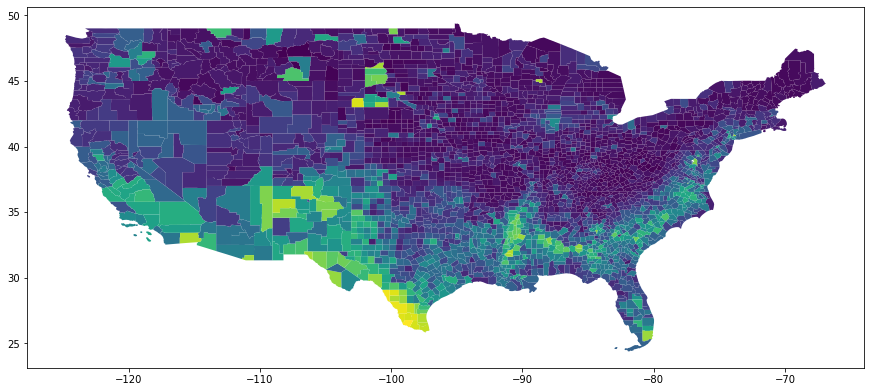

In [95]:
fig,ax = plt.subplots(1,1,figsize = (15,12))
working_gdf.plot(column = 'shared_underrepresented', ax =ax);

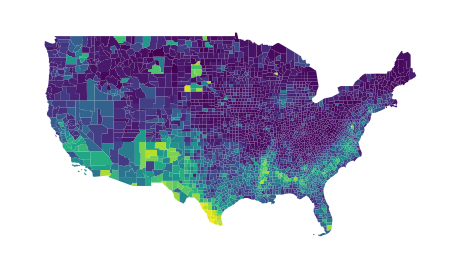

In [89]:
gplt.choropleth(working_gdf, projection=gcrs.WebMercator(), hue='shared_underrepresented');

In [91]:
institutions_df.head(3)

,institution_name,fips_state_code,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,Montana,-108.757816,48.484196,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,Texas,-99.709797,32.468943,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,Georgia,-83.528281,31.481889,4291.0,2660.0,1631.0,Public,4-year or above


In [98]:
geo_institutions = gpd.GeoDataFrame(institutions_df, geometry = gpd.points_from_xy(institutions_df['longitude'],institutions_df['latitude']))

In [99]:
working_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [100]:
geo_institutions.crs

In [101]:
geo_institutions.crs = working_gdf.crs

In [102]:
geo_institutions.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

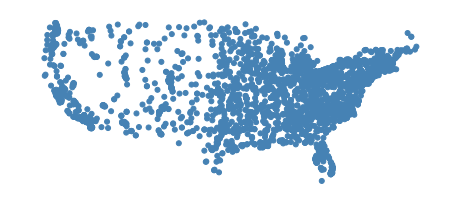

In [103]:
gplt.pointplot(geo_institutions);

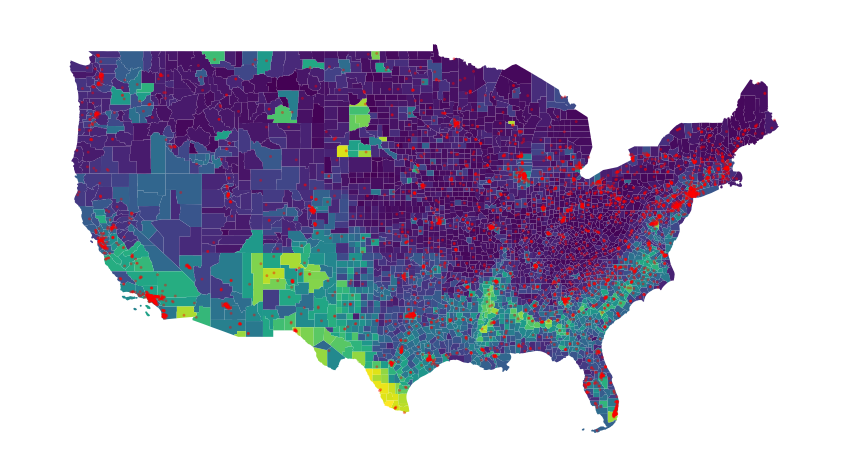

In [106]:
ax = gplt.choropleth(working_gdf, projection=gcrs.WebMercator(), hue='shared_underrepresented', figsize= (15,15))
gplt.pointplot(geo_institutions, ax=ax, zorder=3, alpha=.3, color='r',s=2)

In [107]:
mask_majority_underrepresented = working_gdf['shared_underrepresented'] > .5
working_gdf[mask_majority_underrepresented]

,NAME,geometry,name,shared_underrepresented
GEOID,,,,
48189,Hale,"POLYGON ((-102.08763 34.02656, -102.08779 34.0...","Hale County, Texas",0.634831
28061,Jasper,"POLYGON ((-89.32183 31.96321, -89.32182 31.964...","Jasper County, Mississippi",0.544377
01091,Marengo,"POLYGON ((-87.92970 32.29252, -87.93180 32.297...","Marengo County, Alabama",0.546832
48057,Calhoun,"POLYGON ((-96.87329 28.62291, -96.87148 28.624...","Calhoun County, Texas",0.509561
48177,Gonzales,"POLYGON ((-97.72765 29.52502, -97.72756 29.525...","Gonzales County, Texas",0.571588
...,...,...,...,...
48061,Cameron,"POLYGON ((-97.57587 26.30625, -97.57568 26.306...","Cameron County, Texas",0.900280
36005,Bronx,"POLYGON ((-73.93365 40.88246, -73.93173 40.885...","Bronx County, New York",0.854652
48249,Jim Wells,"POLYGON ((-98.23489 27.87026, -98.23488 27.870...","Jim Wells County, Texas",0.810958


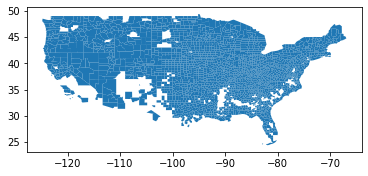

In [109]:
working_gdf[~mask_majority_underrepresented].plot()

In [111]:
majority_underrepresented = working_gdf[mask_majority_underrepresented].copy()

In [114]:
#spatial join
institutions_in_majority_underrepresented = gpd.sjoin(geo_institutions, majority_underrepresented, how='inner', op='intersects')
institutions_in_majority_underrepresented

,institution_name,fips_state_code,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level,geometry,index_right,NAME,name,shared_underrepresented
0,Aaniiih Nakoda College,Montana,-108.757816,48.484196,150.0,108.0,42.0,Public,2-year,POINT (-108.75782 48.48420),30005,Blaine,"Blaine County, Montana",0.534562
3,Abraham Lincoln University,California,-118.256726,34.146294,217.0,194.0,23.0,Private for-profit,4-year or above,POINT (-118.25673 34.14629),06037,Los Angeles,"Los Angeles County, California",0.567856
15,Advanced College,California,-118.157940,33.915383,9.0,9.0,0.0,Private for-profit,2-year,POINT (-118.15794 33.91538),06037,Los Angeles,"Los Angeles County, California",0.567856
64,America Evangelical University,California,-118.308661,34.041239,85.0,49.0,36.0,Private not-for-profit,4-year or above,POINT (-118.30866 34.04124),06037,Los Angeles,"Los Angeles County, California",0.567856
67,American Academy of Dramatic Arts-Los Angeles,California,-118.343701,34.095378,263.0,263.0,0.0,Private not-for-profit,2-year,POINT (-118.34370 34.09538),06037,Los Angeles,"Los Angeles County, California",0.567856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,Wayland Baptist University,Texas,-101.730042,34.187677,4504.0,1014.0,3490.0,Private not-for-profit,4-year or above,POINT (-101.73004 34.18768),48189,Hale,"Hale County, Texas",0.634831
3591,West Hills College-Lemoore,California,-119.823866,36.292431,4239.0,1511.0,2728.0,Public,2-year,POINT (-119.82387 36.29243),06031,Kings,"Kings County, California",0.609362
3619,Western New Mexico University,New Mexico,-108.283284,32.776700,3248.0,1483.0,1765.0,Public,4-year or above,POINT (-108.28328 32.77670),35017,Grant,"Grant County, New Mexico",0.527957
3636,Wharton County Junior College,Texas,-96.085815,29.323800,6768.0,2867.0,3901.0,Public,2-year,POINT (-96.08581 29.32380),48481,Wharton,"Wharton County, Texas",0.547688


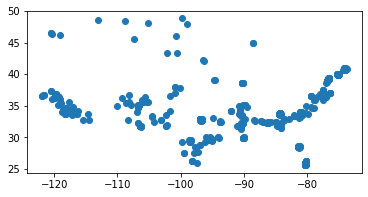

In [115]:
institutions_in_majority_underrepresented.plot();

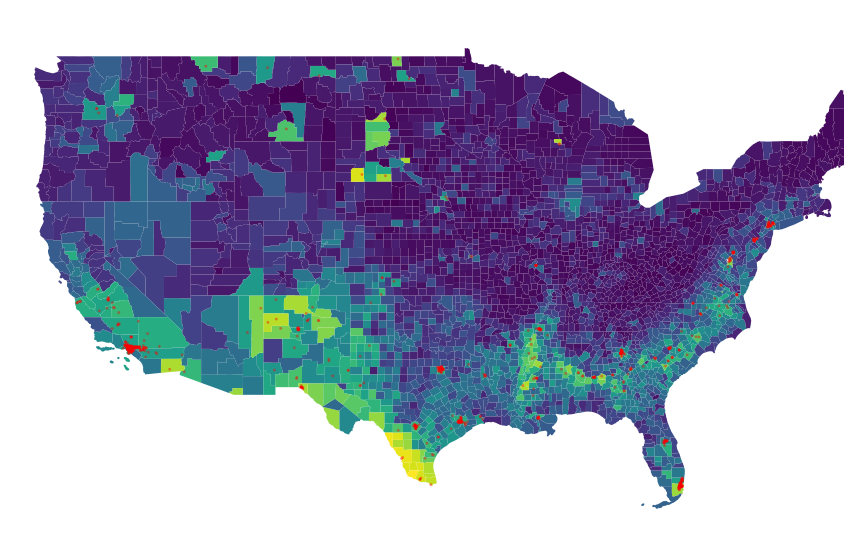

In [116]:
# don't use WebMercator?
ax = gplt.choropleth(working_gdf, projection=gcrs.WebMercator(), hue='shared_underrepresented', figsize= (15,15))
gplt.pointplot(institutions_in_majority_underrepresented, ax=ax, zorder=3, alpha=.3, color='r',s=2);

In [117]:
majority_underrepresented.shape

(294, 4)

In [118]:
counties_shapes.shape

(3107, 18)

In [119]:
geo_institutions.shape

(3714, 10)

In [120]:
institutions_in_majority_underrepresented.shape

(659, 14)

In [121]:
institutions_in_majority_underrepresented.head().T

,0,3,15,64,67
institution_name,Aaniiih Nakoda College,Abraham Lincoln University,Advanced College,America Evangelical University,American Academy of Dramatic Arts-Los Angeles
fips_state_code,Montana,California,California,California,California
longitude,-108.758,-118.257,-118.158,-118.309,-118.344
latitude,48.4842,34.1463,33.9154,34.0412,34.0954
total_enrollment,150,217,9,85,263
full-time_enrollment,108,194,9,49,263
part-time_enrollment,42,23,0,36,0
control,Public,Private for-profit,Private for-profit,Private not-for-profit,Private not-for-profit
level,2-year,4-year or above,2-year,4-year or above,2-year
geometry,POINT (-108.757816 48.484196),POINT (-118.256726 34.146294),POINT (-118.15794 33.915383),POINT (-118.308661 34.041239),POINT (-118.343701 34.095378)


In [122]:
institutions_in_majority_underrepresented['control'].value_counts()

Public                    257
Private not-for-profit    210
Private for-profit        192
Name: control, dtype: int64

In [123]:
institutions_in_majority_underrepresented['control'].value_counts(normalize=True)

Public                    0.389985
Private not-for-profit    0.318665
Private for-profit        0.291351
Name: control, dtype: float64

In [125]:
geo_institutions['control'].value_counts(normalize=True)

Public                    0.429995
Private not-for-profit    0.381260
Private for-profit        0.188745
Name: control, dtype: float64